### K 近邻算法

存在一个样本数据集合, 也称训练集, 并且样本的每个数据存在标签, 即我们知道样本集中每一个数据与所属分类的对应关系.输入没有标签的新数据集之后, 将输入数据的每个特征和样本集中的数据的特征对应比较, 然后算法提取样本集中特征最相似数据的分类标签.一般来说我们一般选取 k 个最相似的数据, 称为 `k 近邻`, 简称 `KNN`.

#### k-近邻算法的一般流程

+ 收集数据: 可以使用任何方法.
+ 准备数据: 距离计算所需的数值, 最好是结构化数据格式.
+ 分析数据: 可以使用任何方法.
+ 训练数据: 此步骤不适用于 `k`近邻算法.
+ 测试算法: 计算错误率.
+ 使用算法: 首先需要输入样本数据和结构化数据的输出结果, 然后运行 `k` 近邻算法判定输入数据分别属于哪一类. 最后应用对计算出的分类执行后处理.

In [1]:
# 准备: 使用 Python 导入数据.

import numpy as np # Numpy 数组模块
import operator # 运算模块
import matplotlib.pyplot as plt


In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1],[1.0, 1.0], [0, 0],[0, 0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [3]:
group,labels =createDataSet() # 调用创建数据集的函数

In [4]:
group # 特征

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [5]:
labels # 标签

['A', 'A', 'B', 'B']

In [6]:
# 画出散点图.

#### 实施 `KNN` 算法

对未知类别属性的数据集中的每个点依次执行以下操作.

+ 计算已知类别数据集中的点与当前点之间的距离.
+ 按照距离递减次序排序.
+ 选取与当前点距离最小的 `k` 个点.
+ 确定前 `k` 个点所在的类别出现的频率.
+ 返回前 `k` 个点出现频率最高的类别作为当前点的预测分类.

In [7]:
# KNN 算法.

def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqdistance = sqDiffMat.sum(axis=1)
    distances = sqdistance**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
    

In [8]:
test = classify0([0,0],group,labels,3)
print('test label is:',test)

test label is: B


### 约会网站的配对问题.

约会网站会推荐不同的人选, 交往过的人的标签:

+ 不喜欢的人
+ 魅力一般的人
+ 极具有魅力的人

#### 在约会网站上使用 `k`近邻算法
+ 收集数据集: 提供文本文件
+ 准备数据: 使用 `Python` 解析文本文件
+ 分析数据: 使用 `Matlotlib` 画出二维扩散图
+ 训练算法: 此步骤不适应 `k` 近邻算法
+ 测试算法: 使用海伦提供的部分数据作为测试样本, 测试样本和费测试样本的区别在于: 测试样本已经按成分类的数据,　如果分类错误与实际类别不同, 则标记一个错误.
+ 使用算法: 产生简单的命令航程序


In [9]:
# 准备数据：　从文本中解析数据

## 将文本记录转换为 Numpy 的解析程序

def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [10]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [25]:
import matplotlib.font_manager as mfm 
import matplotlib.lines as mlines

In [26]:
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    font = mfm.FontProperties(fname=r"/home/xm/repository/xm-mathpy/ML/fonts/Sim/simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

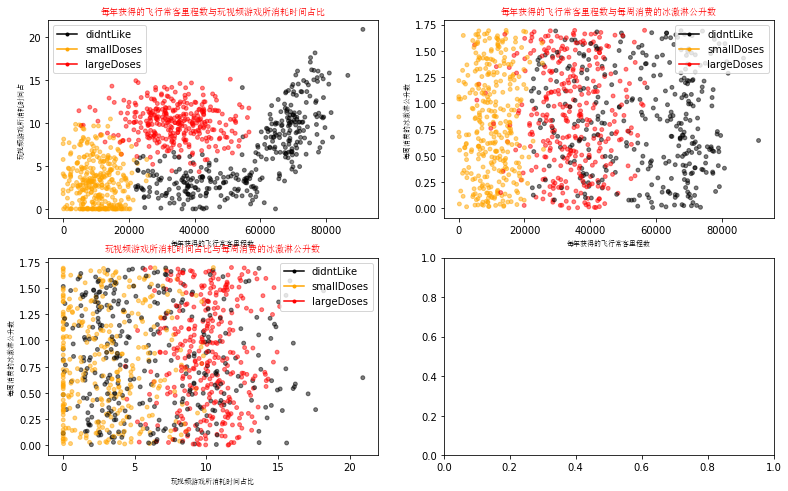

In [27]:
showdatas(datingDataMat, datingLabels)

我们已经给出数据集特征属性的两两之间的关系数据可视化.

#### 准备数据: 归一化数值

如果要计算两个样本之间的距离,　在这种不同取值范围的特征值时,　我们通常采用的方法是数值归一化,　如果将取值范围处理到 0 到 1　或 -1 到1 之间.

计算公式

$$
new_value = \frac{oldevalue-minvalue}{maxvalue-minvalue}
$$

In [33]:
# 归一化数值的函数

def autoNorm(dataSet):
    minVals = dataSet.min(0) # 函数可以从列中选出最小值
    maxVals = dataSet.max(0) # 函数可以从列中选出最大值
    ranges = maxVals - minVals 
    normDataSet = np.zeros(dataSet.shape)
    m = dataSet.shape[0]
    normDataSet = dataSet- np.tile(minVals,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [34]:
normDataSet,ranges,minVals = autoNorm(datingDataMat)

In [35]:
normDataSet

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [36]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [37]:
minVals

array([ 0.      ,  0.      ,  0.001156])

#### 测试算法:保证完整程序验证分类器

+ 90% 的样本作为训练集
+ 10% 的样本作为测试集
+ 使用错误率来验证分类器的性能

In [79]:
# 分类器针对约会网站的的测试代码

def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normDataSet,ranges,minVals = autoNorm(datingDataMat)
    #datingLabels = np.array(datingLabels)
    m = normDataSet.shape[0]
    numTestVecs = np.int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normDataSet[i,:],normDataSet[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the clasifier came back with:%d, the real answer is:%d' %(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print('the total error rate is:%f' %(errorCount/np.float(numTestVecs)))

In [80]:
data_test_class = datingClassTest()

the clasifier came back with:3, the real answer is:3
the clasifier came back with:2, the real answer is:2
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:3, the real answer is:3
the clasifier came back with:3, the real answer is:3
the clasifier came back with:1, the real answer is:1
the clasifier came back with:3, the real answer is:3
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:2, the real answer is:2
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:1, the real answer is:1
the clasifier came back with:2, the real answe

### 使用算法:构建完整可用系统

In [81]:
# 约会网站预测函数

def classifyPerson():
    resultList = ['not at all','in small doses','inlarge doses']
    percentTats = np.float(input('percentage of time spent playing video games?'))
    ffMiles = np.float(input('frequent flier miles earned per year'))
    iceCream = np.float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normDataSet,ranges,minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats,iceCream])
    
    classifierResult = classify0((inArr-minVals)/ranges,normDataSet,datingLabels,3)
    print('You will probably like this person:',resultList[classifierResult-1])
    

In [82]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


### 手写识别系统

使用 K 近邻算法的手写识别系统

+ 收集数据:提供文本文件
+ 准备数据:编写函数 classify0(), 将图像格式转换为分类器使用的 list 格式.